# An Exploration of the Poisson Distribution

Straightforward exploration of the Poisson distribution using RooFit.

We begin by constructing an empy workspace that will contain the model.

In [1]:
import ROOT

Welcome to JupyROOT 6.12/06


In [2]:
w = ROOT.RooWorkspace("w")


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



## Construct a single Poisson model

Construct expression for expected event count Nexp = mu * S + B, with S and B fixed

In [3]:
w.factory("expr::Nexp('mu*S+B',mu[1,-1,10],S[10],B[20])")

<ROOT.RooFormulaVar object ("Nexp") at 0x88e4020>

Construct Poisson probability model for Nobs given Nexp

In [4]:
w.factory("Poisson::model(Nobs[0,100],Nexp)")

<ROOT.RooPoisson object ("model") at 0x8c11d70>

### Plot model(Nobs)

Make empty plot frame in Nobs

In [5]:
frame = w.var("Nobs").frame()

Plot distribution of model on the frame.

Given that model is discrete in Nobs, enhance precision of adaptive sampling of plot projection machinery to correctly map jumps in probability at integer values (the plotting machinery generically expects continuous functions) and draw the plot frame on the canvas.

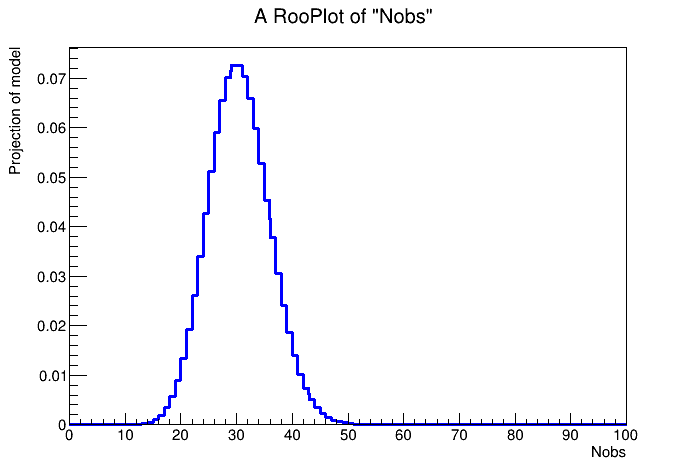

In [6]:
c = ROOT.TCanvas()
w.pdf("model").plotOn(frame,ROOT.RooFit.Precision(1e-4))
frame.Draw()
c.Draw()

## Construct a dataset containing a single observed event count

Construct an empty dataset for observable Nobs

In [7]:
d = ROOT.RooDataSet("d","d",ROOT.RooArgSet(w.var("Nobs"))) 

Set Nobs to desired observed event count

In [8]:
w.var("Nobs").setVal(25)

Add observation of 25 events to dataset

In [9]:
d.add(ROOT.RooArgSet(w.var("Nobs")))

## Fit model to observed data (one step method )

Perform ML fit of model to data (one-step method)

In [10]:
w.pdf("model").fitTo(d)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_model_FOR_OBS_Nobs with 0 entries
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mu           1.00000e+00  1.00000e+00   -1.00000e+00  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=2.97367 FROM MIGRAD    STATUS=INITIATE        4 CALLS           5 TOTAL
                     EDM= un

## Construct -log Likelihood L(mu) from model and data

Construct $-\log(\mathcal{L})$ function

In [11]:
nll = w.pdf("model").createNLL(d)

[#1] INFO:Minization -- createNLL picked up cached consraints from workspace with 0 entries


Plot $-\log\mathcal{L}(\mu)$ in the range [-1,10]

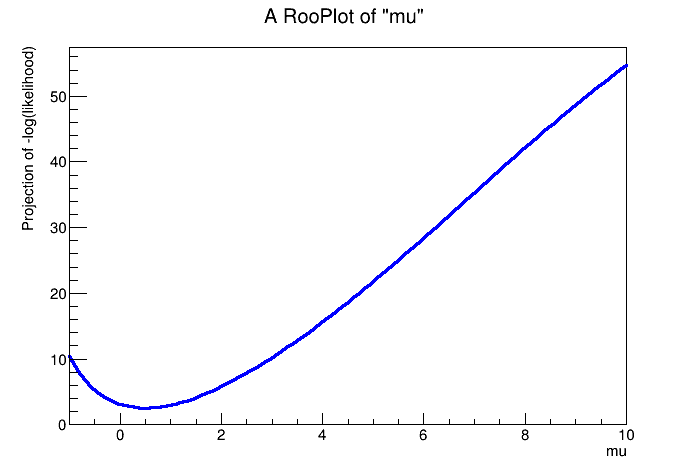

In [12]:
frame2 = w.var("mu").frame(-1,10)
nll.plotOn(frame2)
frame2.Draw()
c.Draw()

Construct the (profile) likelihood ratio $\lambda = -\log \mathcal{L}(\mu) / \mathcal{L}(\hat{\mu})$

In [13]:
lam = nll.createProfile(ROOT.RooArgSet(w.var("mu")))

Plot the likelihood ratio on the same (with a red line color to distinguish) 

[#1] INFO:Minization -- RooProfileLL::evaluate(nll_model_d_Profile[mu]) Creating instance of MINUIT
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_model_d_Profile[mu]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_model_d_Profile[mu]) minimum found at (mu=0.5)
..........................................................................................................................................................................................................

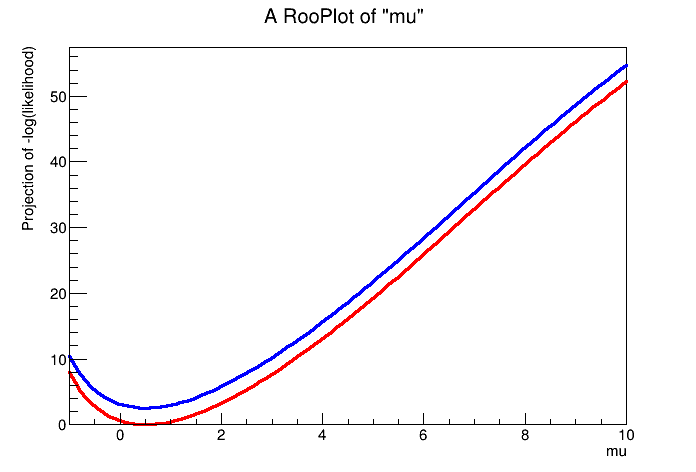

In [14]:
lam.plotOn(frame2,ROOT.RooFit.LineColor(ROOT.kRed))
frame2.Draw()
c.Draw()